## Import the necessary modules

In [ ]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib import style
style.use('seaborn-poster')

## Let's create a dummy set of data
The dummy data is created using a random increament or decreament over a set of {-variance to +variance} with a provided step size

In [ ]:
def define_dataset(howMuch, variance, step=2, correlation=False):
    value = 1
    ys = []
    for i in range(howMuch):
        y = value + random.randrange(-variance, variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            value += step
        elif correlation and correlation == 'neg':
            value -= step
    xs = [i for i in range(len(ys))]
    
    return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)

## Slope and Intercept

The equation of a straight line is $y = m * x + b$, where ***'m'*** is the slope of the line and ***'b'*** is the y-intercept. The best fit line is the line that has the best slope and y-intercept.
<img src= "http://www.mathwarehouse.com/algebra/linear_equation/images/slope-intercept-form/general-formula-of-slope-intercept-form_new.png">

#### For linear regression, we calculate the slope with the below formula:


$$m = \frac{\bar{x}.\bar{y}-\bar{xy}}{(\bar{x})^2 - \bar{x^2}}$$ *where $\bar{x}$ is the mean of all data points in the vector x*

#### Once we have the value of the slope, we calculate the y-intercept with the below formula:
$$b = \bar{y} - m * \bar{x}$$

In [ ]:
def best_fit_slope_and_intercept(xs, ys):
    m = (mean(xs) * mean(ys) - mean(xs * ys)) / (mean(xs) ** 2 - mean(xs ** 2))
    b = mean(ys) - m * mean(xs)
    return m, b

In [ ]:
def squarred_error(ys, ys_hat):
    return sum((ys_hat - ys) ** 2)

## Squared Error
The error is the fraction of the predicted value to the mean value. We calculate the resultant error from the below formula:

$$r^2 = 1 - \frac{SE\hat{y}}{SE\bar{y}}$$ *where SE is the standard error, $\hat{y}$ is the predicted value, and $\bar{y}$ is the mean value*

As the formula suggests, this $r^2$ value needs to be as close to 1 as possible. Just for the sake of understanding, lets call this the coefficient of determination, i.e. how good the algorithm predicted the output.

In [ ]:
def coefficient_of_determination(ys, ys_hat):
    y_mean_line = [mean(ys) for _ in ys]
    sq_err = squarred_error(ys, ys_hat)
    sq_err_y_mean = squarred_error(ys, y_mean_line)
    return 1 - (sq_err / sq_err_y_mean)

## Data

*Now we create different types of datasets: with positive and negative correlation between the points and changing variance*

In [ ]:
xs1, ys1 = define_dataset(40, 10, 2, correlation='pos')
xs2, ys2 = define_dataset(40, 90, 2, correlation='pos')
xs3, ys3 = define_dataset(40, 40, 2, correlation='neg')

*Next, we calculate each of their best fit slope and intercept*

In [ ]:
m1, b1 = best_fit_slope_and_intercept(xs1, ys1)
regression_line1 = [(m1 * x + b1) for x in xs1]

m2, b2 = best_fit_slope_and_intercept(xs2, ys2)
regression_line2 = [(m2 * x + b2) for x in xs2]

m3, b3 = best_fit_slope_and_intercept(xs3, ys3)
regression_line3 = [(m3 * x + b3) for x in xs3]

In [ ]:
predict_x1 = 8
predict_y1 = m1 * predict_x1 + b1

predict_x2 = 8
predict_y2 = m2 * predict_x2 + b2

*Let's measure the coefficients of determination for both types of datasets with positive correlation.*

*As we can see, the one with lesser correlation has got a better fit.*

In [ ]:
r_squarred1 = coefficient_of_determination(ys1, regression_line1)
print('r_squarred1 = {0}'.format(r_squarred1))

r_squarred2 = coefficient_of_determination(ys2, regression_line2)
print('r_squarred2 = {0}'.format(r_squarred2))

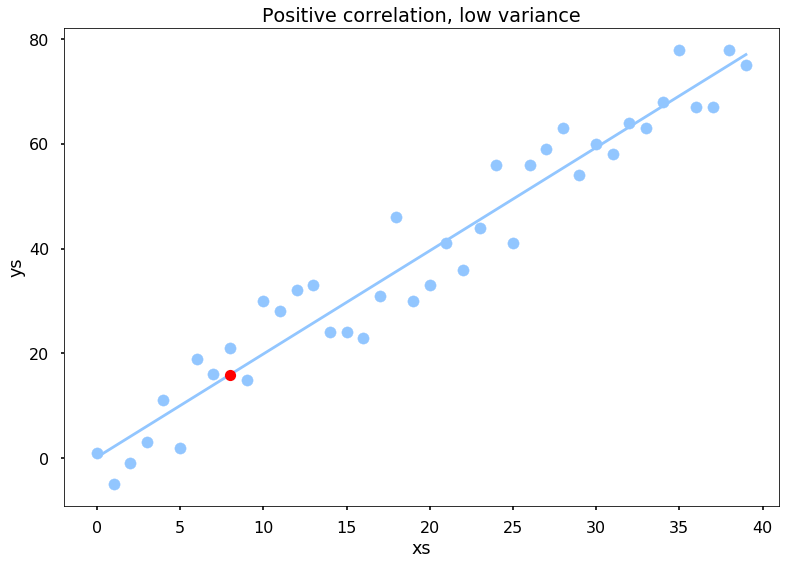

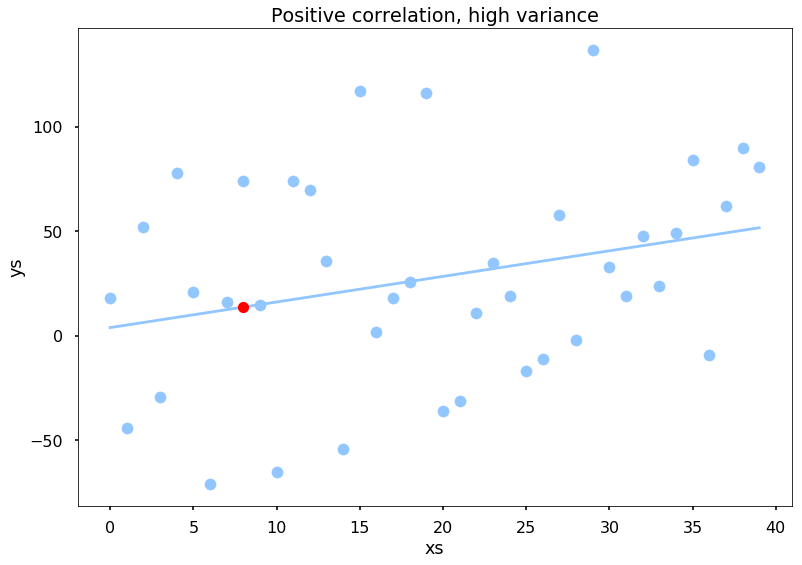

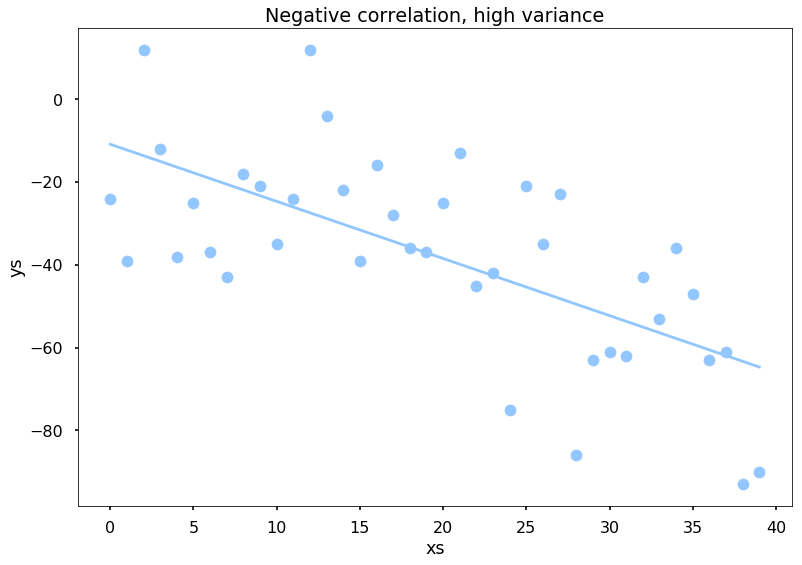

In [20]:
plt.scatter(xs1, ys1)
plt.plot(xs1, regression_line1)
plt.plot(predict_x1, predict_y1, 'ro')
plt.xlabel("xs")
plt.ylabel("ys")
plt.title("Positive correlation, low variance")
plt.show()

plt.scatter(xs2, ys2)
plt.plot(xs2, regression_line2)
plt.plot(predict_x2, predict_y2, 'ro')
plt.xlabel("xs")
plt.ylabel("ys")
plt.title("Positive correlation, high variance")
plt.show()

plt.scatter(xs3, ys3)
plt.plot(xs2, regression_line3)
plt.xlabel("xs")
plt.ylabel("ys")
plt.title("Negative correlation, high variance")
plt.show()